<div style="text-align: center;">
    <h1><strong>Titanic Dataset Exploratory Data Analysis</strong></h1>
</div>


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("titanic_train.csv")

#### For viewing the initial few rows of the dataframe, the head() function is used.

In [3]:
data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,23
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,23
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,23
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,23
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,23


The dataset typically includes the following information for each passenger:

Passenger Class (Pclass): Indicates the class of the ticket (1st, 2nd, or 3rd class).<br>
Name: The name of the passenger.<br>
Sex: The gender of the passenger.<br>
Age: The age of the passenger.<br>
SibSp: The number of siblings or spouses aboard.<br>
Parch: The number of parents or children aboard.<br>
Ticket: The ticket number.<br>
Fare: The fare paid for the ticket.<br>
Cabin: The cabin number.<br>
Embarked: The port at which the passenger embarked (C = Cherbourg, Q = Queenstown, S = Southampton).<br>

#### The describe() function provides the values of various statiscal functions of all the numeric columns of the dataframe.

In [4]:
data.describe()

,Pclass,Age,SibSp,Parch,Fare,Survived
count,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208,15.974186
std,0.836071,14.526497,1.102743,0.806057,49.693429,6.714934
min,1.000000,0.420000,0.000000,0.000000,0.000000,12.000000
25%,2.000000,20.125000,0.000000,0.000000,7.910400,12.000000
50%,3.000000,28.000000,0.000000,0.000000,14.454200,13.000000
75%,3.000000,38.000000,1.000000,0.000000,31.000000,15.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200,34.000000


#### The isnull() function() visualizes for us all the NULL values in the dataframe. This function is practically inefficient because for a dataframe consisting of a thousand rows, we cannot go checking each row for the presence of NULL values.

In [5]:
data.isnull()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,False,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,True,False,False
887,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,True,False,False
889,False,False,False,False,False,False,False,False,False,False,False


#### Instead, we use the 'isnull()' function in aggregation with the 'sum()' function to get the sum of all the NULL values, is present in the dataset.

In [6]:
data.isnull().sum()

Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
Survived      0
dtype: int64

#### From this we come to know that the column age and column cabin has a large number of null values along with two values from the embarked column.

<div style="text-align: center;">
    <h1 style="color: darkblue;"><strong>Q1: Are there any missing values in the dataset?</strong></h1>
</div>

In [7]:
data.isnull().sum().sum()

866

#### Yes, there are a total of 866 missing values in the dataset.

<div style="text-align: center;">
    <h1 style="color: darkblue;"><strong>Q2: What is the size of the dataset (number of rows and columns)?</strong></h1>
</div>

In [8]:
data.shape

(891, 11)

#### Our dataset consists of 12 columns with 891 rows.

<div style="text-align: center;">
    <h1 style="color: darkblue;"><strong>Q3: How many passengers have missing cabin information?</strong></h1>
</div>

#### We've come accross with two columns that have missing data on a large scale. i.e., 'Cabin' column and the 'Age' column.

In [9]:
num_passengers_with_missing_cabin = data['Cabin'].isnull().sum()
print(f'Number of passengers with missing cabin information: {num_passengers_with_missing_cabin}')

Number of passengers with missing cabin information: 687


In [10]:
data.drop('Cabin', axis=1, inplace=True)

In [11]:
data.shape

(891, 10)

In [12]:
data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,23
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,23
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,23
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,23
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,23


<div style="text-align: center;">
    <h1 style="color: darkblue;"><strong>Q4: How many passengers survived, and how many did not?</strong></h1>
</div>

In [13]:
total_survivors = data['Survived'].sum()
print("Total number of survivors:", total_survivors)


Total number of survivors: 14233


#### This means that 342 people surived in the titanic and 549 didn't.

## Duplicating column in dataset

#### Why are we duplicating the 'Survived' column?
The reason is because the 'Survived' column with string datatype is necessary if we want to plot it in some kind of chart. However, for grouping the data on the basis of this column, we would need it with the 'int' datatype

In [14]:
data['Survived_string'] = data['Survived']

In [15]:
data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived,Survived_string
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,23,23
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,23,23
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,23,23
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,23,23
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,23,23


In [16]:
data.dtypes

Pclass               int64
Name                object
Sex                 object
Age                float64
SibSp                int64
Parch                int64
Ticket              object
Fare               float64
Embarked            object
Survived             int64
Survived_string      int64
dtype: object

In [17]:
data['Survived_string'] = data['Survived_string'].astype(str)

In [18]:
data.dtypes

Pclass               int64
Name                object
Sex                 object
Age                float64
SibSp                int64
Parch                int64
Ticket              object
Fare               float64
Embarked            object
Survived             int64
Survived_string     object
dtype: object

In [19]:
data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived,Survived_string
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,23,23
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,23,23
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,23,23
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,23,23
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,23,23


<div style="text-align: center;">
    <h1 style="color: darkblue;"><strong>Q5: How many people surived on the basis of gender?</strong></h1>
</div>

In [20]:
data.groupby(['Sex'], as_index=False)['Survived'].sum()

,Sex,Survived
0,female,5089
1,male,9144


#### Out of the total 342 people who survived the incident, 233 were females and 109 were males.

<div style="text-align: center;">
    <h1 style="color: darkblue;"><strong>Q6: How does the survival rate vary with gender?</strong></h1>
</div>

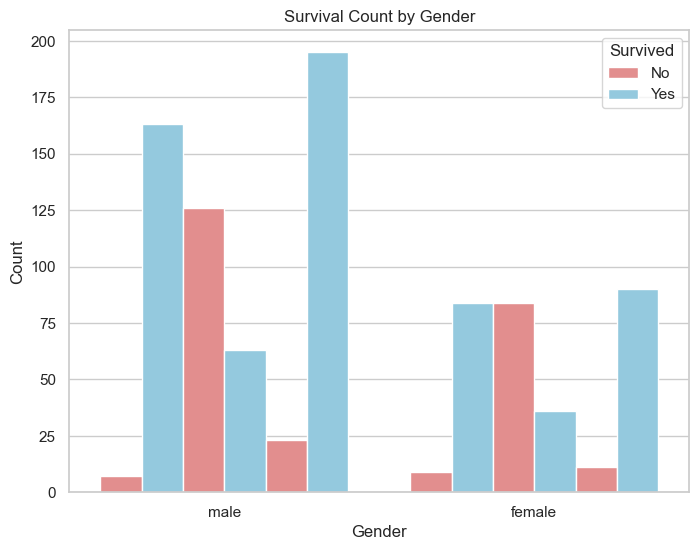

In [21]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Sex', hue='Survived_string', palette=['#f08080', '#87CEEB'])

plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Survival Count by Gender")

plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()

#### Hence, we have learned that when it comes to survival rate, most of the females survived and most males did not.

<div style="text-align: center;">
    <h1 style="color: darkblue;"><strong>Q7 : What is the survival rate with respect to passenger class?</strong></h1>
</div>

#### There were three passenger classes:
Class 1: Richer people </br>
Class 2: Upper middle </br>
Class 3: Poor people

In [22]:
data.groupby(['Pclass'], as_index=False)['Survived'].sum()

,Pclass,Survived
0,1,3594
1,2,2859
2,3,7780


#### From this, we have learned that the passenger class of 1 that is more for the rich people. They are the highest in number with regards to the survival rate. And those who belonged to the 3rd class(lower class), they had the lowest survival rate

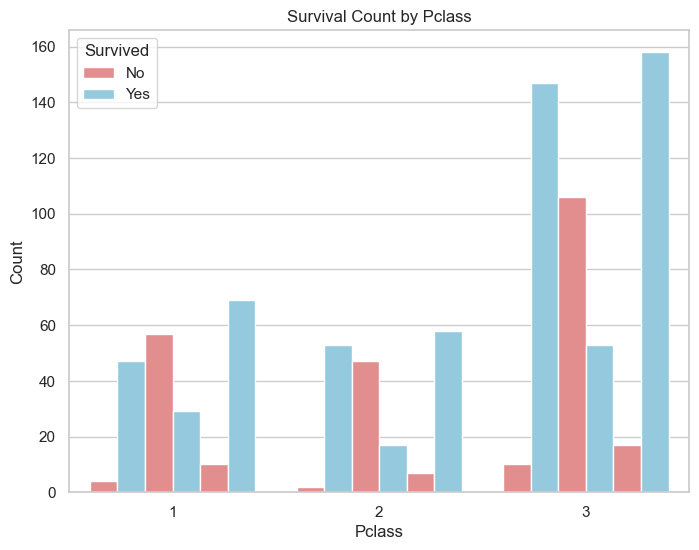

In [23]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Pclass', hue='Survived_string', palette=['#f08080', '#87CEEB'])

plt.xlabel("Pclass")
plt.ylabel("Count")
plt.title("Survival Count by Pclass")

plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()

<div style="text-align: center;">
    <h1 style="color: darkblue;"><strong>Q8: What is the survival rate with respect to both gender and passenegr class?</strong></h1>
</div>

In [24]:
ss = data.groupby(['Pclass', 'Sex'], as_index=False)['Survived'].sum()
ss

,Pclass,Sex,Survived
0,1,female,1595
1,1,male,1999
2,2,female,1235
3,2,male,1624
4,3,female,2259
5,3,male,5521


In [25]:
ss.dtypes

Pclass       int64
Sex         object
Survived     int64
dtype: object

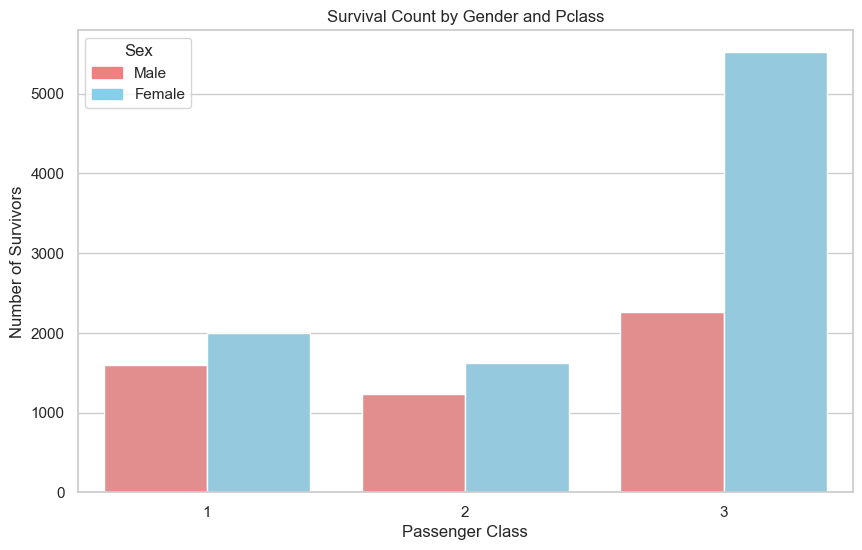

In [26]:
ss['Pclass'] = ss['Pclass'].astype(str)
ss['Sex'] = ss['Sex'].astype(str)

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
palette = sns.color_palette(['#f08080', '#87CEEB'], len(ss['Sex'].unique()))

ax = sns.barplot(data=ss, x='Pclass', y='Survived', hue='Sex', palette=palette)

plt.xlabel("Passenger Class")
plt.ylabel("Number of Survivors")
plt.title("Survival Count by Gender and Pclass")

legend_labels = ["Male", "Female"]
legend_handles = [plt.Rectangle((0,0),1,1, color=palette[i], label=label) for i, label in enumerate(legend_labels)]
plt.legend(handles=legend_handles, title="Sex")

plt.show()

In [27]:
data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived,Survived_string
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,23,23
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,23,23
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,23,23
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,23,23
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,23,23


<div style="text-align: center;">
    <h1 style="color: darkblue;"><strong>Q9: What is the distribution of passenger ages?</strong></h1>
</div>

In [28]:
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
age_labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70+']

data['Age_Group'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels)
age_survived_freq = pd.crosstab(index=data['Age_Group'], columns=data['Survived'], margins=True, margins_name='Total')

print(age_survived_freq)

Survived    12   13   15  20  23  34  Total
Age_Group                                  
0-9         21   21   13   0   2   7     64
10-19       34   43   24   3   3   8    115
20-29       68   69   60   3   3  27    230
30-39       36   53   35  11   4  16    155
40-49       21   30   22   5   0   8     86
50-59       11   14    6   3   3   5     42
60-69        4    4    5   0   0   4     17
70+          2    2    0   0   0   1      5
Total      197  236  165  25  15  76    714


In [29]:
data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived,Survived_string,Age_Group
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,23,23,20-29
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,23,23,30-39
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,23,23,20-29
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,23,23,30-39
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,23,23,30-39


<div style="text-align: center;">
    <h1 style="color: darkblue;"><strong>10: What are the most common embarkation ports for passengers?</strong></h1>
</div>

In [30]:
embarkation_counts = data['Embarked'].value_counts()

print("Most Common Embarkation Ports:")
print(embarkation_counts)

Most Common Embarkation Ports:
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


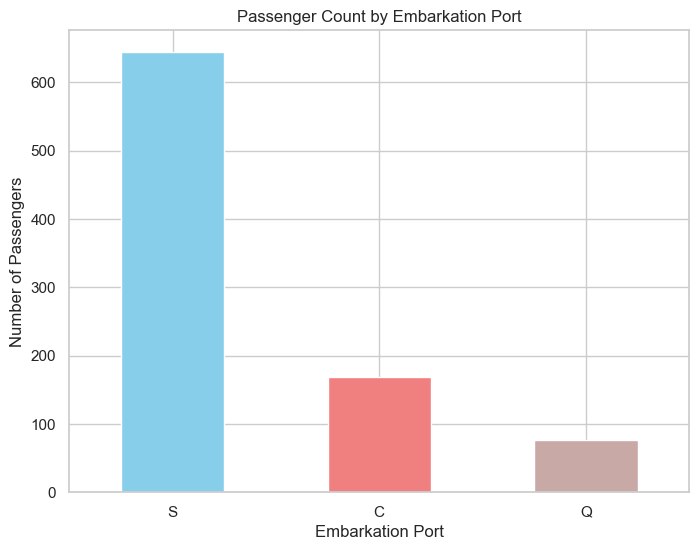

In [31]:
plt.figure(figsize=(8, 6))
embarkation_counts.plot(kind='bar', color=['skyblue', 'lightcoral', '#C9A9A6'])
plt.xlabel("Embarkation Port")
plt.ylabel("Number of Passengers")
plt.title("Passenger Count by Embarkation Port")
plt.xticks(rotation=0)
plt.show()

#### Embarkation port 'S' was the most used. Compared to the 'C' and the 'Q'.
S => Southampton, England </br>
C => Cherbourg, France </br>
Q => Queenstown (now known as Cobh), Ireland

<div style="text-align: center;">
    <h1 style="color: darkblue;"><strong>Q11: What is the survival rate of passengers travelling alone and those who were travelling with family?</strong></h1>
</div>

In [32]:
data['Alone'] = (data['SibSp'] == 0) & (data['Parch'] == 0)
survival_rates = data.groupby('Alone')['Survived'].mean()

print("Survival Rates:")
print(survival_rates)

Survival Rates:
Alone
False    15.850282
True     16.055866
Name: Survived, dtype: float64


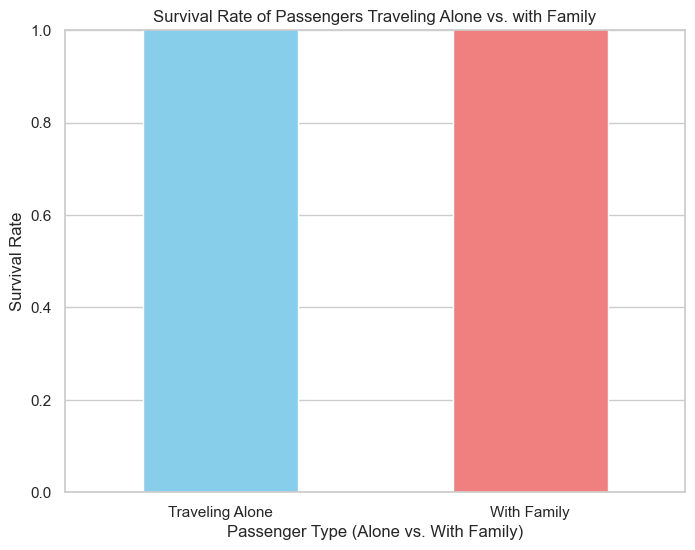

In [33]:
plt.figure(figsize=(8, 6))
survival_rates.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.xlabel("Passenger Type (Alone vs. With Family)")
plt.ylabel("Survival Rate")
plt.title("Survival Rate of Passengers Traveling Alone vs. with Family")
plt.xticks([0, 1], ['Traveling Alone', 'With Family'], rotation=0)
plt.ylim(0, 1)
plt.show()

#### The survival rate for passengers travelling alone is much higher as compared to those travelling with family.

<div style="text-align: center;">
    <h1 style="color: darkblue;"><strong>Q12: What was the survival rate of the passengers based on the basis of Embarkation Port?</strong></h1>
</div>

In [34]:
a = data.groupby('Embarked', as_index=False)['Survived'].value_counts()
print(a)

   Embarked  Survived  count
0         C        13     50
1         C        12     45
2         C        15     39
3         C        34     23
4         C        20      9
5         C        23      2
6         Q        12     23
7         Q        13     23
8         Q        15     21
9         Q        34      7
10        Q        20      2
11        Q        23      1
12        S        13    211
13        S        12    178
14        S        15    150
15        S        34     69
16        S        20     23
17        S        23     13


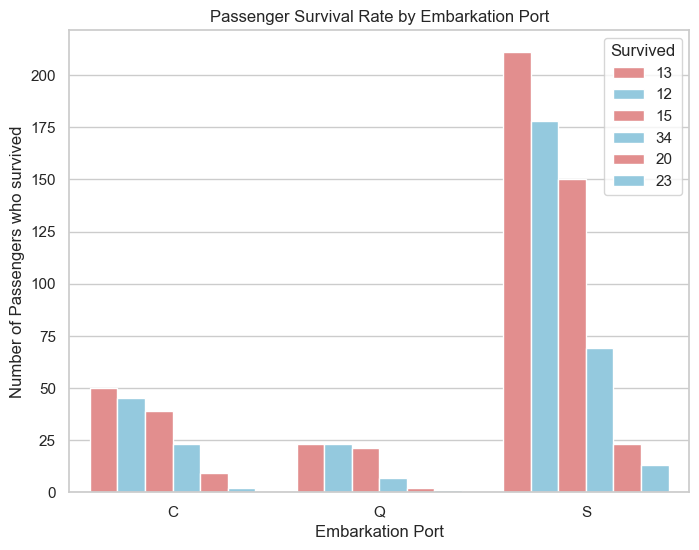

In [35]:
a['Survived'] = a['Survived'].astype(str)
plt.figure(figsize=(8, 6))
sns.barplot(data=a, x = 'Embarked', y = 'count', hue = 'Survived', palette=['#f08080', '#87CEEB'])
plt.xlabel("Embarkation Port")
plt.ylabel("Number of Passengers who survived")
plt.title("Passenger Survival Rate by Embarkation Port")
plt.show()

#### The survival rate for passengers who boarded the Embarkation port 'S' is higher as compared to the other ports.

In [36]:
data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived,Survived_string,Age_Group,Alone
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,23,23,20-29,False
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,23,23,30-39,False
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,23,23,20-29,True
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,23,23,30-39,False
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,23,23,30-39,True


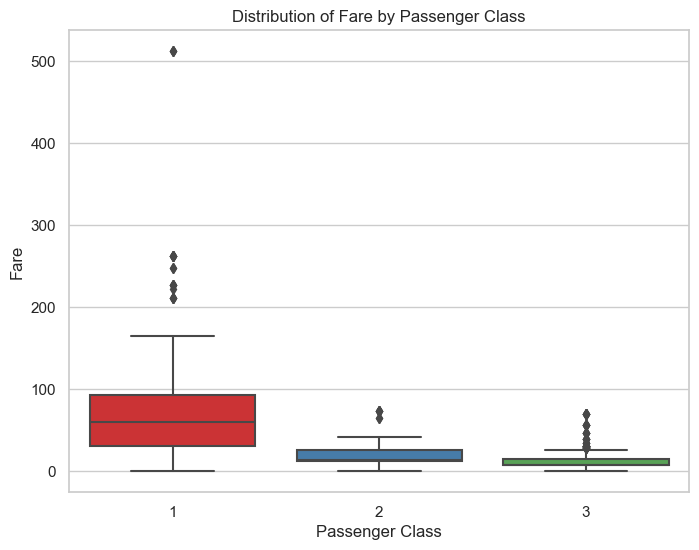

In [37]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Pclass', y='Fare', palette='Set1')
plt.xlabel("Passenger Class")
plt.ylabel("Fare")
plt.title("Distribution of Fare by Passenger Class")
# plt.ylim(0, 100)
plt.show()

#### Yes, the fare for passengers on the Titanic is typically related to their passenger class. In general, passengers in higher classes (such as first class) paid higher fares, while those in lower classes (such as third class) paid lower fares.

<div style="text-align: center;">
    <h1 style="color: darkblue;"><strong>Q14: What is the relationship between Embarked and Fare?</strong></h1>
</div>

In [38]:
data.groupby('Embarked', as_index=False)['Fare'].describe()

,Embarked,count,mean,std,min,25%,50%,75%,max
0,C,168.0,59.954144,83.912994,4.0125,13.69795,29.70,78.500025,512.3292
1,Q,77.0,13.276030,14.188047,6.7500,7.75000,7.75,15.500000,90.0000
2,S,644.0,27.079812,35.887993,0.0000,8.05000,13.00,27.900000,263.0000


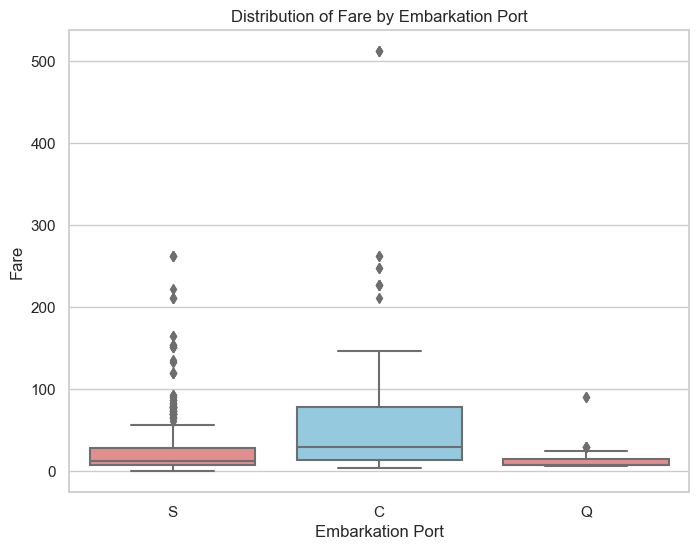

In [39]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Embarked', y='Fare', palette=['lightcoral', 'skyblue'])
plt.xlabel("Embarkation Port")
plt.ylabel("Fare")
plt.title("Distribution of Fare by Embarkation Port")
plt.show()

#### The relationship between "Embarked" and "Fare" in the Titanic dataset indicates variations in average fares for passengers from different embarkation ports. It helps us understand if there were differences in ticket prices based on where passengers boarded the ship (Cherbourg, Queenstown, or Southampton). There were differences in ticket prices based on where passengers boarded the ship (Cherbourg, Queenstown, or Southampton). On average, passengers who boarded at Cherbourg tended to pay higher fares compared to passengers from Queenstown and Southampton

<div style="text-align: center;">
    <h1 style="color: darkblue;"><strong>Q15: What is the relationship between Embarkation port and passenger class?</strong></h1>
</div>

In [40]:
data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived,Survived_string,Age_Group,Alone
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,23,23,20-29,False
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,23,23,30-39,False
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,23,23,20-29,True
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,23,23,30-39,False
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,23,23,30-39,True


In [41]:
a1 = data.groupby(['Pclass'], as_index=False)['Embarked'].value_counts()
a1

,Pclass,Embarked,count
0,1,S,127
1,1,C,85
2,1,Q,2
3,2,S,164
4,2,C,17
5,2,Q,3
6,3,S,353
7,3,Q,72
8,3,C,66


In [42]:
a1.dtypes

Pclass       int64
Embarked    object
count        int64
dtype: object

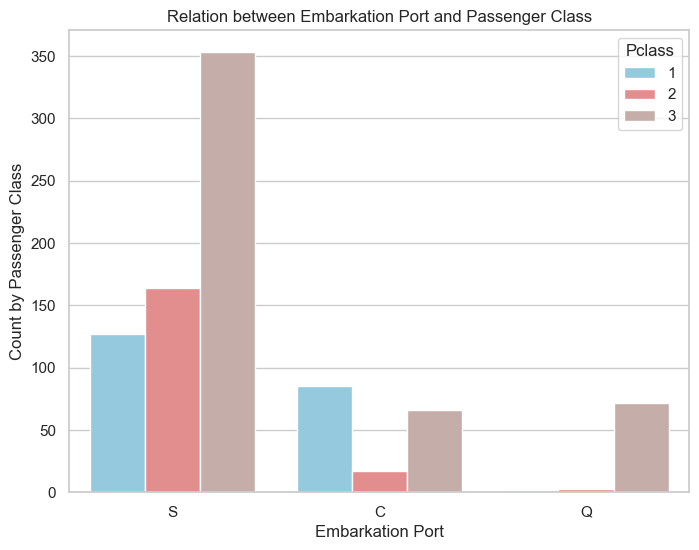

In [43]:
a1['Pclass'] = a1['Pclass'].astype(str)
plt.figure(figsize=(8, 6))
sns.barplot(data=a1, x='Embarked', y='count', hue='Pclass', palette = ['skyblue', 'lightcoral', '#C9A9A6'])
plt.xlabel("Embarkation Port")
plt.ylabel("Count by Passenger Class")
plt.title("Relation between Embarkation Port and Passenger Class")
plt.show()

#### The relationship between embarkation port and passenger class reveals how the distribution of passengers in different classes (First Class, Second Class, Third Class) varied based on where they boarded the ship (Cherbourg, Queenstown, or Southampton). Cherbourg had more first-class passengers, Queenstown had more third-class passengers, and Southampton had a mix of classes.

<div style="text-align: center;">
    <h1 style="color: darkblue;"><strong>Q16: What is the relationship between age and survival rate, stratified by sex?</strong></h1>
</div>

In [44]:
t_data = data

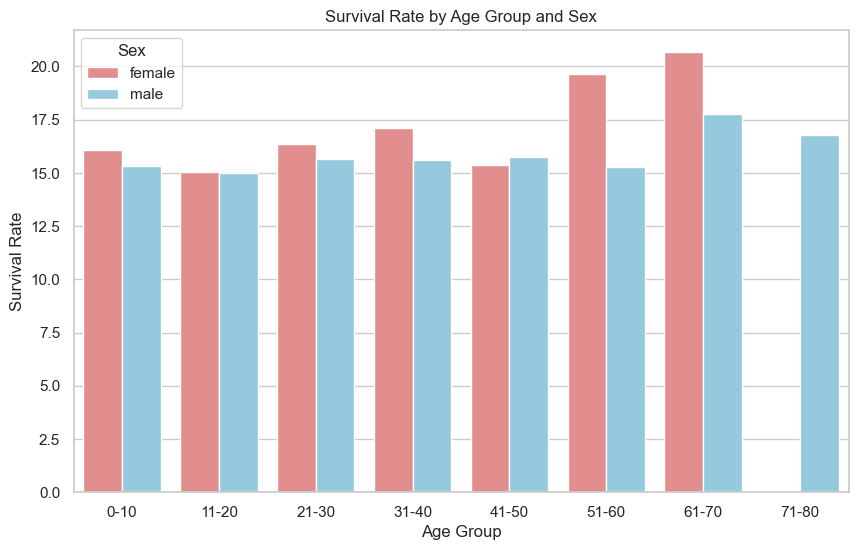

In [45]:
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
age_labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80']
t_data['age_group'] = pd.cut(t_data['Age'], bins=age_bins, labels=age_labels)
survival_rates = t_data.groupby(['Sex', 'age_group'])['Survived'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x="age_group", y="Survived", hue="Sex", data=survival_rates,palette=['#f08080', '#87CEEB'])
plt.title("Survival Rate by Age Group and Sex")
plt.xlabel("Age Group")
plt.ylabel("Survival Rate")
plt.xticks(rotation=0)
plt.show()

#### The relationship between age and survival rate, stratified by sex, reveals how the likelihood of surviving the Titanic disaster was influenced by both age and gender. In general, women were more likely to survive than men in each age group.n. Generally, children and women had higher survival rates, while elderly passengers had lower survival rateups.

<div style="text-align: center;">
    <h1 style="color: darkblue;"><strong>Q17: What is the relationship between family size and survival rate, stratified by passenger class?</strong></h1>
</div>

C:\Users\lenovo\AppData\Local\Temp\ipykernel_2324\1141369252.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="family_size", y="Survived", hue="Pclass", data=t_data, palette=custom_colors ,ci = None)


<Figure size 640x480 with 0 Axes>

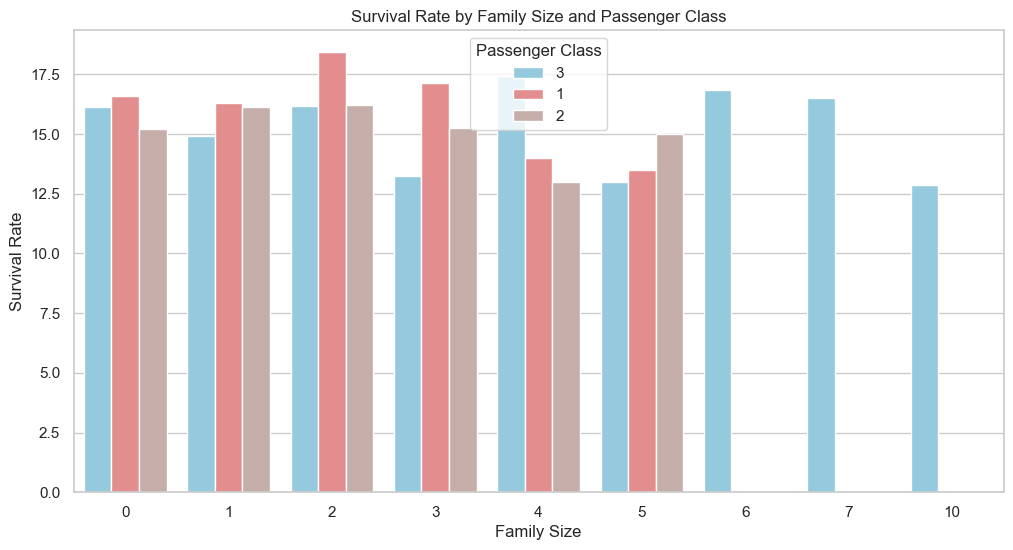

In [46]:
t_data['Pclass'] = t_data['Pclass'].astype('str')
t_data['family_size'] = t_data['SibSp'] + t_data['Parch']
plt.gcf().set_facecolor("#F9DEC9")
custom_colors = ['skyblue', 'lightcoral', '#C9A9A6']
plt.figure(figsize=(12, 6))
sns.barplot(x="family_size", y="Survived", hue="Pclass", data=t_data, palette=custom_colors ,ci = None)
plt.title("Survival Rate by Family Size and Passenger Class")
plt.xlabel("Family Size")
plt.ylabel("Survival Rate")
plt.legend(title="Passenger Class")
plt.xticks(rotation=0)
plt.show()

* The survival rate was higher for passengers in higher cabin classes.
* The survival rate for passengers in third class was particularly low.
* Passengers traveling with smaller families or as solo travelers had higher survival rates

<div style="text-align: center;">
    <h1 style="color: darkblue;"><strong>Q18: How does the survival rate vary with passenger class?</strong></h1>
</div>

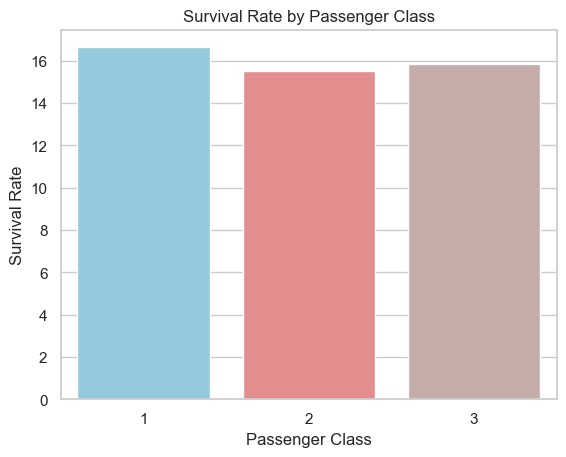

In [47]:
survival_rates = t_data.groupby('Pclass')['Survived'].mean().reset_index()

sns.barplot(data=survival_rates, x='Pclass', y='Survived', palette = ['skyblue', 'lightcoral', '#C9A9A6'])
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Passenger Class')
plt.show()

#### We noticed the fact there that; The Upper class survived more then Lower because they received better rescue resources ,survivors from upper class were given the high priority.

<div style="text-align: center;">
    <h1 style="color: darkblue;"><strong>Q19: What is the districution of Age for Survivors and non-survivors?</strong></h1>
</div>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


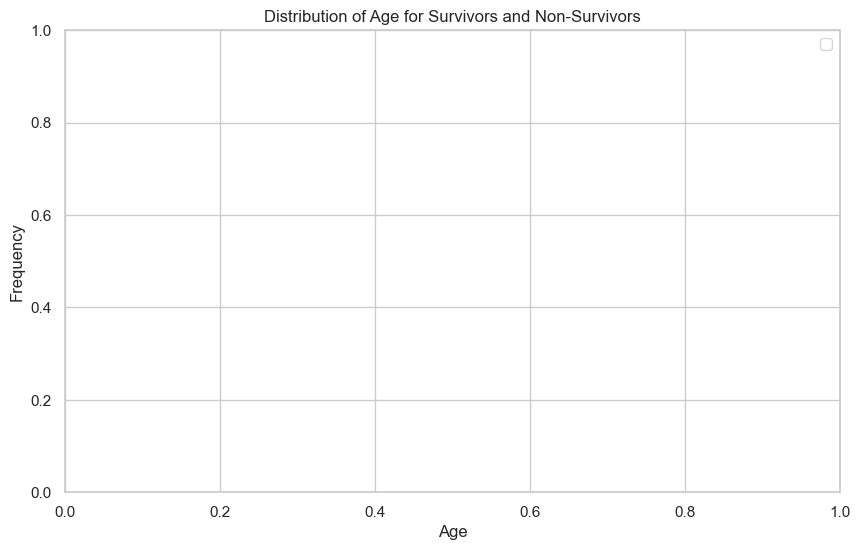

In [48]:
survivors = t_data[t_data['Survived'] == 1]['Age'].dropna()
non_survivors = t_data[t_data['Survived'] == 0]['Age'].dropna()
plt.figure(figsize=(10, 6))
sns.histplot(survivors, kde=True, label='Survivors', color='skyblue')
sns.histplot(non_survivors, kde=True, label='Non-Survivors', color='lightcoral')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution of Age for Survivors and Non-Survivors')
plt.show()

* We clearly see that the Survivors are minimum in the Age group between 0 - 20 and 40 -70.
* While the non-survivors are maximun between Age 20 - 35

<div style="text-align: center;">
    <h1 style="color: darkblue;"><strong>Q20: What is the distribution of family size for survivors and non-survivors?</strong></h1>
</div>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


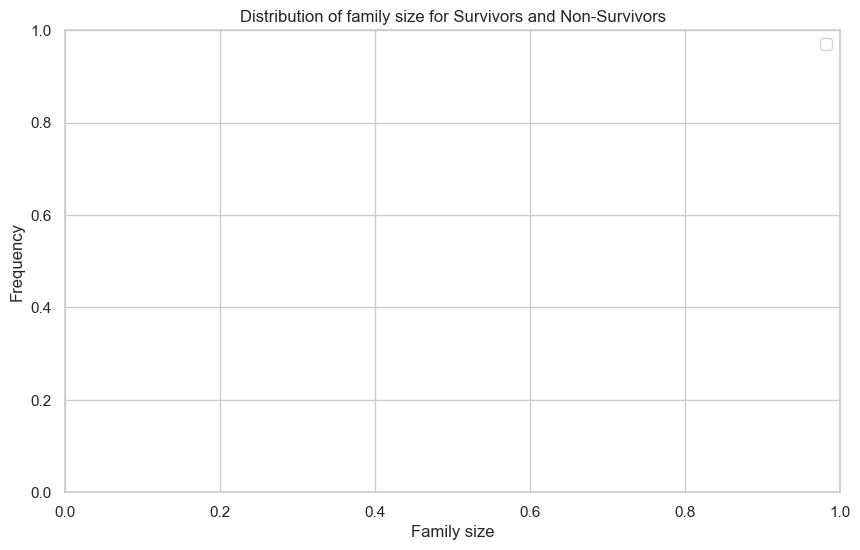

In [49]:
t_data['family_size'] = t_data['SibSp']+t_data['Parch']
survivors = t_data[t_data['Survived'] == 1]['family_size']
non_survivors = t_data[t_data['Survived'] == 0]['family_size']
plt.figure(figsize=(10, 6))
sns.histplot(survivors, kde=True, label='Survivors', color='skyblue')
sns.histplot(non_survivors, kde=True, label='Non-Survivors', color='lightcoral')
plt.xlabel('Family size')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution of family size for Survivors and Non-Survivors')
plt.show()

#### We clearly see that the lesser the family size the greater the non-survivors*

<div style="text-align: center;">
    <h1 style="color: darkblue;"><strong>Q21: What is the distribution of fare for survivors and non-survivors?</strong></h1>
</div>

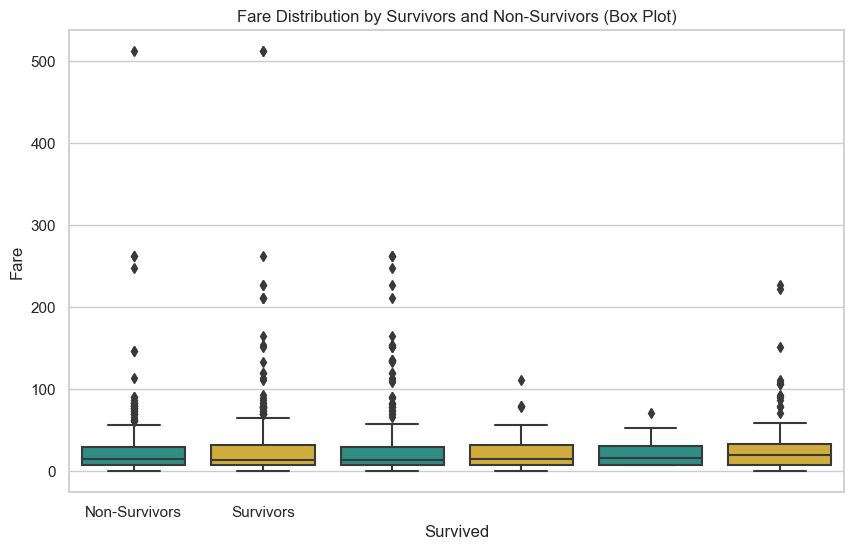

In [50]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Survived', y='Fare', data=t_data, palette=['#219C90', '#E9B824'])
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.title('Fare Distribution by Survivors and Non-Survivors (Box Plot)')
plt.xticks([0, 1], ['Non-Survivors', 'Survivors'])
plt.show()

#### Survivors had a higher proportion of passengers who paid higher fares, while non-survivors had a higher proportion of passengers who paid lower fares. This suggests a correlation between fare and survival, with passengers who paid more having a better chance of surviving

<div style="text-align: center;">
    <h1 style="color: darkblue;"><strong>Q22: What is the relationship between family size and survival rate?</strong></h1>
</div>

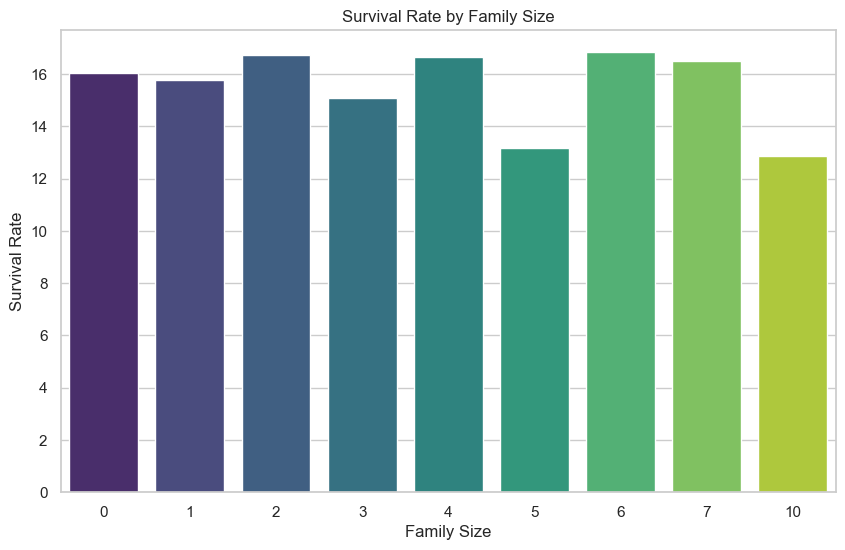

In [51]:
t_data['FamilySize'] = t_data['SibSp'] + t_data['Parch']
family_size_survival_rate = t_data.groupby('FamilySize')['Survived'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='FamilySize', y='Survived', data=family_size_survival_rate, palette='viridis')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Family Size')
plt.show()

*As we See that the family size of 1-3 has higher survival rate*

<div style="text-align: center;">
    <h1 style="color: darkblue;"><strong>Q23: Are passengers with specific ticket prefixes more likely to survive?</strong></h1>
</div>

In [52]:
t_data['TicketPrefix'] = t_data['Ticket'].str.extract(r'([A-Za-z]+)')

Survival Rate for Passengers with 'STON' Prefix: 14.61
Survival Rate for Passengers without 'STON' Prefix: 16.00


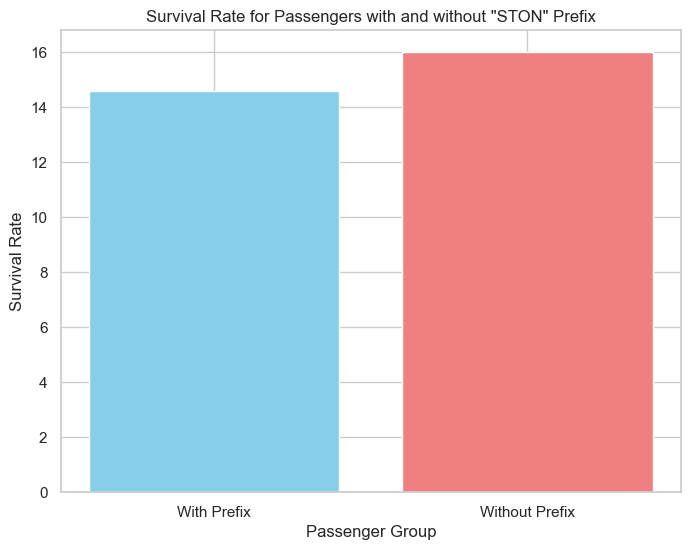

In [53]:
specific_prefix = 'STON'
t_data['HasSpecificPrefix'] = (t_data['TicketPrefix'] == specific_prefix).astype(int)
#we separeted the prefix we will analyze
survival_rate_with_prefix = t_data[t_data['HasSpecificPrefix'] == 1]['Survived'].mean()
survival_rate_without_prefix = t_data[t_data['HasSpecificPrefix'] == 0]['Survived'].mean()

print(f"Survival Rate for Passengers with '{specific_prefix}' Prefix: {survival_rate_with_prefix:.2f}")
print(f"Survival Rate for Passengers without '{specific_prefix}' Prefix: {survival_rate_without_prefix:.2f}")

plt.figure(figsize=(8, 6))
plt.bar(['With Prefix', 'Without Prefix'], [survival_rate_with_prefix, survival_rate_without_prefix], color = ['skyblue', 'lightcoral'])
plt.xlabel('Passenger Group')
plt.ylabel('Survival Rate')
plt.title(f'Survival Rate for Passengers with and without "{specific_prefix}" Prefix')
plt.show()

#### There is slighlty less variation of tickets with prefix to tickets without prefix so, it has significance to no effect upon survival rate.

In [54]:
t_data.describe()

,Age,SibSp,Parch,Fare,Survived,family_size,FamilySize,HasSpecificPrefix
count,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208,15.974186,0.904602,0.904602,0.020202
std,14.526497,1.102743,0.806057,49.693429,6.714934,1.613459,1.613459,0.140770
min,0.420000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400,12.000000,0.000000,0.000000,0.000000
50%,28.000000,0.000000,0.000000,14.454200,13.000000,0.000000,0.000000,0.000000
75%,38.000000,1.000000,0.000000,31.000000,15.000000,1.000000,1.000000,0.000000
max,80.000000,8.000000,6.000000,512.329200,34.000000,10.000000,10.000000,1.000000


<div style="text-align: center;">
    <h1 style="color: darkblue;"><strong>Q24: What is the average fare paid by passengers?</strong></h1>
</div>

In [55]:
t_data['Fare'].mean()

32.204207968574636

#### The average fare paid by passengers is 32 dollars.

<div style="text-align: center;">
    <h1 style="color: darkblue;"><strong>Q25: What does the cross-tabulation table reveal about the distribution of passengers across different classes based on their number of siblings? </strong></h1>
</div>

In [56]:
pd.crosstab([t_data.Sex,t_data.Survived],t_data.Pclass,margins=True).style.background_gradient(cmap='summer_r')

#### We can observe that majority of passengers without siblings abroad did not survive .There might be a reason that  passengers with family or siblings were given the high priority.However, passengers with no siblings had more time to rescue themselves. 

<div style="text-align: center;">
    <h1 style="color: darkblue;"><strong>Q26: What is the distribution of passenger titles (Mr., Mrs., Miss, etc.) based on names?</strong></h1>
</div>

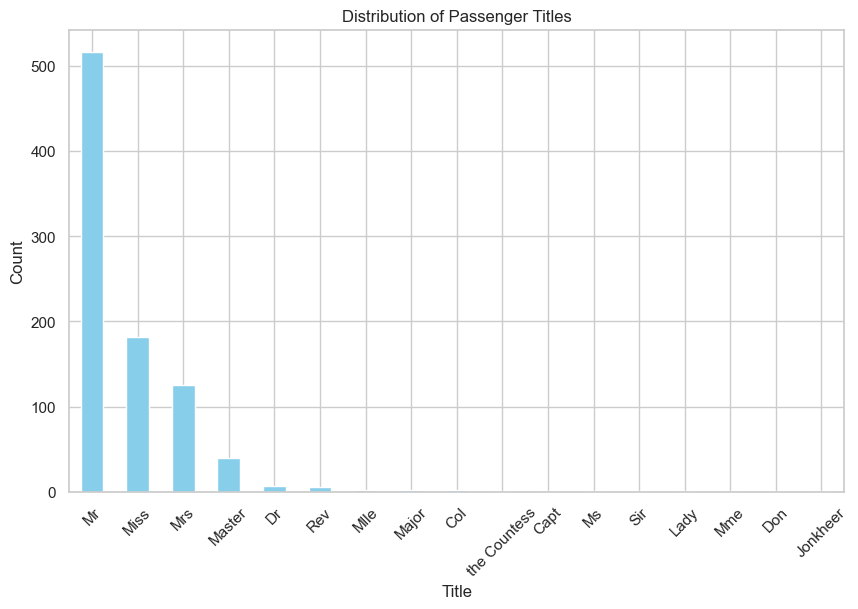

In [57]:
t_data['Title'] = t_data['Name'].str.split(',').str[1].str.split('.').str[0].str.strip()
titles_count = t_data['Title'].value_counts()
plt.figure(figsize=(10, 6))
titles_count.plot(kind='bar', color='skyblue')
plt.title('Distribution of Passenger Titles')
plt.xlabel('Title')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


#### There are more than 500 Passengers having title Mr. as compared to other titles.

<div style="text-align: center;">
    <h1 style="color: darkblue;"><strong>Q27: What is the distribution of passengers in different age groups (e.g., children, adults, seniors)?</strong></h1>
</div>

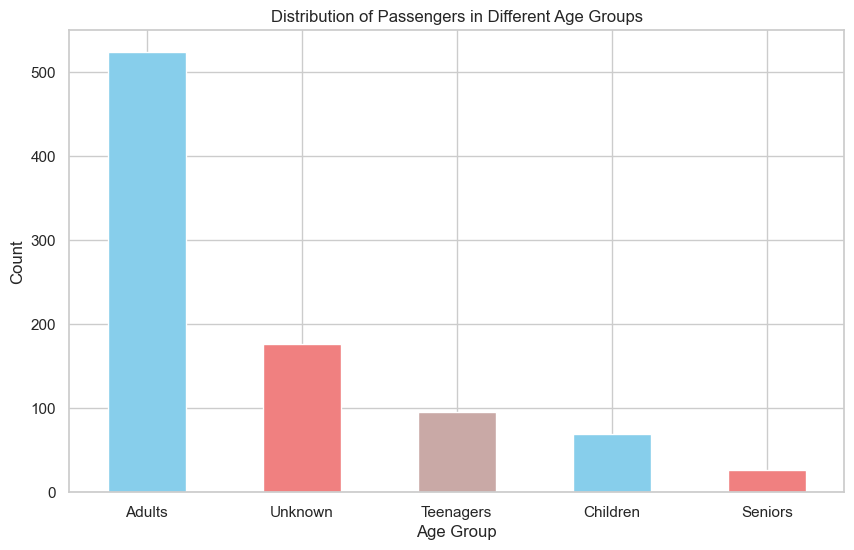

In [58]:
age_groups = {
    'Children': (0, 12),
    'Teenagers': (13, 19),
    'Adults': (20, 59),
    'Seniors': (60, 100)
}

def categorize_age(age):
    for group, (min_age, max_age) in age_groups.items():
        if min_age <= age <= max_age:
            return group
    return 'Unknown'

t_data['AgeGroup'] = t_data['Age'].apply(categorize_age)
age_group_counts = t_data['AgeGroup'].value_counts()

plt.figure(figsize=(10, 6))
age_group_counts.plot(kind='bar', color=['skyblue', 'lightcoral', '#C9A9A6'])
plt.title('Distribution of Passengers in Different Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

#### The majority of passengers in the Titanic dataset are adults.

<div style="text-align: center;">
    <h1 style="color: darkblue;"><strong>Q29:  What does the cross-tabulation table between 'SibSp' (the number of siblings/spouses aboard) and 'Pclass' (passenger class) reveal about the distribution of passengers across different classes based on their family relationships?</strong></h1>
</div>

In [60]:
pd.crosstab([t_data.SibSp], t_data.Survived).style.background_gradient('summer_r')

Survived,12,13,15,20,23,34
SibSp,,,,,,
0,163,200,142,23,9,71
1,55,65,52,10,6,21
2,8,7,9,1,0,3
3,7,4,3,0,1,1
4,9,5,2,0,0,2
5,2,1,1,0,0,1
8,3,3,1,0,0,0


#### We can observe that the majority of the lower class passengers were travelling alone.

<div style="text-align: center;">
    <h1 style="color: darkblue;"><strong>Q30: What is the distribution of ticket numbers?</strong></h1>
</div>

In [ ]:
t_data['TicketPrefix']

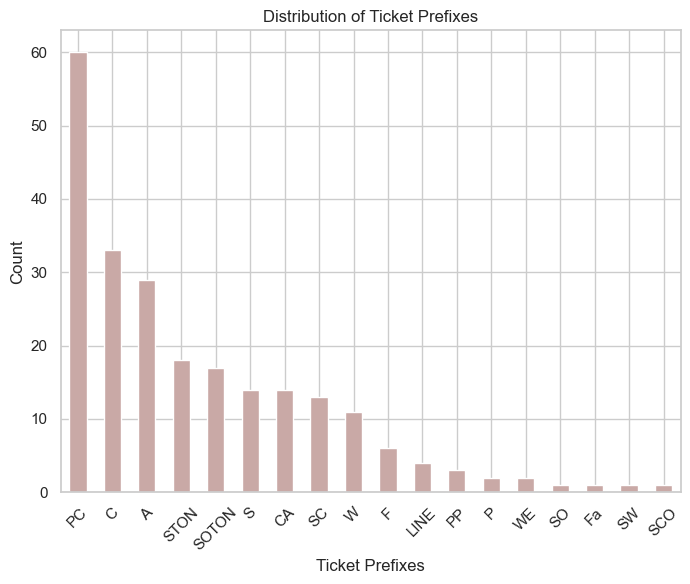

In [61]:
tickets_counts = t_data['TicketPrefix'].value_counts()

plt.figure(figsize=(8, 6))
tickets_counts.plot(kind='bar', color='#c9a9a6')
plt.title('Distribution of Ticket Prefixes')
plt.xlabel('Ticket Prefixes')
plt.ylabel('Count')
plt.xticks(rotation=45)  
plt.show()

#### The presence of 'PC' ticket prefixes suggests that a significant number of passengers on the Titanic enjoyed a higher level of luxury and comfort, likely belonging to a wealthier or more privileged class.

<div style="text-align: center;">
    <h1 style="color: darkblue;"><strong>Q31: What is the median fare within each passenger class?</strong></h1>
</div>

In [63]:
median_fares = t_data.groupby('Pclass')['Fare'].median().reset_index()
print(median_fares)

  Pclass     Fare
0      1  60.2875
1      2  14.2500
2      3   8.0500


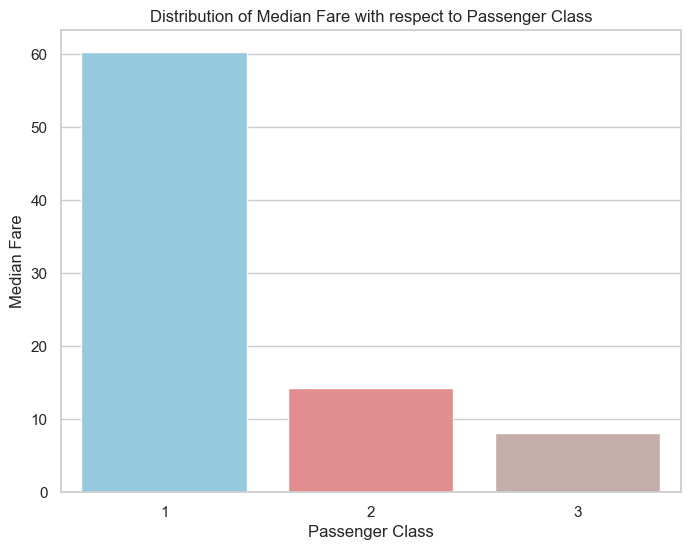

In [64]:
plt.figure(figsize=(8, 6))
sns.barplot(data = median_fares, x='Pclass', y='Fare', palette=['skyblue', 'lightcoral', '#C9A9A6'])
plt.xlabel("Passenger Class")
plt.ylabel("Median Fare")
plt.title("Distribution of Median Fare with respect to Passenger Class")
plt.xticks(rotation=0)
plt.show()

<div style="text-align: center;">
    <h1 style="color: darkblue;"><strong>Q32: How many passengers paid the same fare, and what is their survival rate?</strong></h1>
</div>

In [65]:
fare_groups = t_data.groupby('Fare').agg({'Survived': ['count', 'mean']}).reset_index()
fare_groups.columns = ['Fare', 'PassengerCount', 'SurvivalRate']

print("Passengers with the Same Fare and Their Survival Rate:")
print(fare_groups)

Passengers with the Same Fare and Their Survival Rate:
         Fare  PassengerCount  SurvivalRate
0      0.0000              15     15.600000
1      4.0125               1     15.000000
2      5.0000               1     13.000000
3      6.2375               1     15.000000
4      6.4375               1     13.000000
..        ...             ...           ...
243  227.5250               4     18.750000
244  247.5208               2     13.500000
245  262.3750               2     14.000000
246  263.0000               4     13.500000
247  512.3292               3     12.666667

[248 rows x 3 columns]


<div style="text-align: center;">
    <h1 style="color: darkblue;"><strong>Q33: Are there any outliers in the age distribution?</strong></h1>
</div>

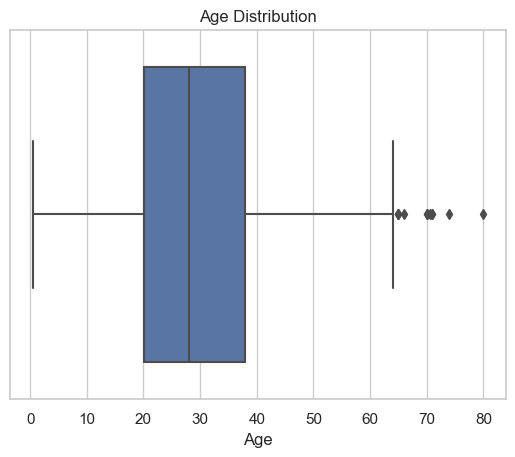

In [66]:
sns.boxplot(x=t_data['Age'])
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()


#### Data points between 63 to 80 appear as outliers indicating the presence of older passengers with ages significantly above the specified range.

<div style="text-align: center;">
    <h1 style="color: darkblue;"><strong>Q34: Are there any outliers in the fare distribution?</strong></h1>
</div>

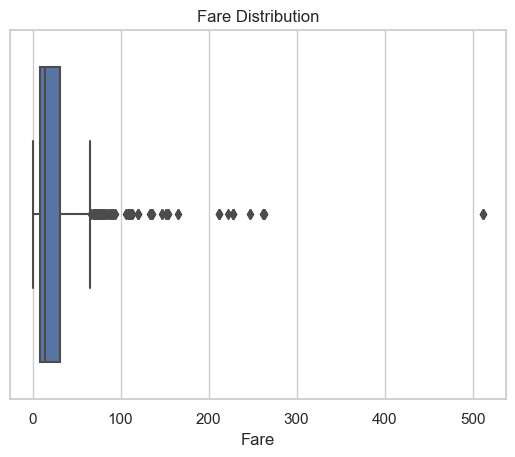

In [67]:
sns.boxplot(x=t_data['Fare'])
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.show()

####  We noticed that one data point stands out as an extreme outlier significantly deviating from the central tendency of the fare distribution.

<div style="text-align: center;">
    <h1 style="color: darkblue;"><strong>Q35: What is the average fare paid by passengers?</strong></h1>
</div>

In [68]:
data['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<div style="text-align: center;">
    <h1 style="color: darkblue;"><strong>Q36: How many passengers had siblings or spouses aboard (SibSp)?</strong></h1>
</div>

In [69]:
sibsp_count = data[data['SibSp'] > 0]['SibSp'].count()
print(f'The number of passengers with siblings or spouses aboard is: {sibsp_count} out of {data.shape[0]} passengers.')

The number of passengers with siblings or spouses aboard is: 283 out of 891 passengers.


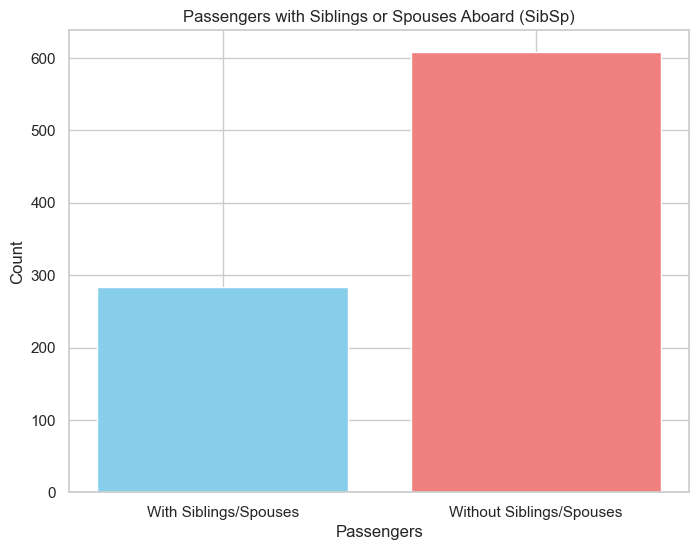

In [70]:
plt.figure(figsize=(8, 6))
plt.bar(['With Siblings/Spouses', 'Without Siblings/Spouses'], [sibsp_count, len(data) - sibsp_count], color=['skyblue', 'lightcoral'])
plt.xlabel('Passengers')
plt.ylabel('Count')
plt.title('Passengers with Siblings or Spouses Aboard (SibSp)')
plt.show()

<div style="text-align: center;">
    <h1 style="color: darkblue;"><strong>Q37: How many passengers had parents or children aboard (Parch)?</strong></h1>
</div>

In [71]:
parent_children_count = data[data['Parch'] > 0]['Parch'].count()
print(f'The number of passengers with parents or children aboard is: {parent_children_count} out of {data.shape[0]} passengers.')

The number of passengers with parents or children aboard is: 213 out of 891 passengers.


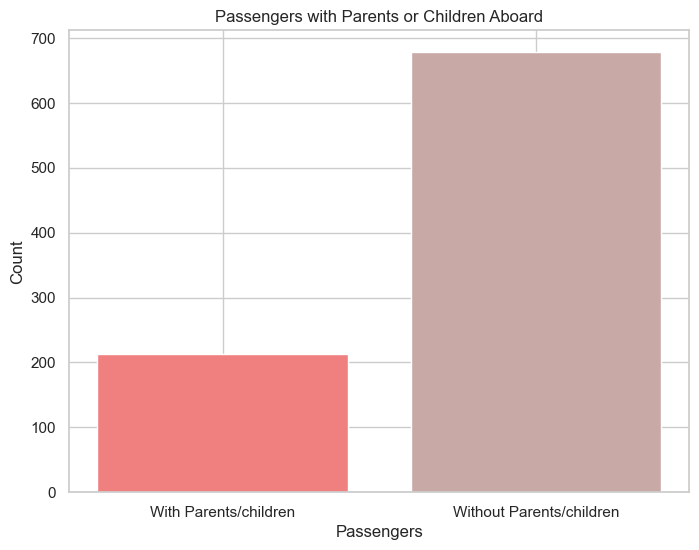

In [72]:
plt.figure(figsize=(8, 6))
plt.bar(['With Parents/children', 'Without Parents/children'], [parent_children_count, len(data) - parent_children_count], color=['lightcoral', '#C9A9A6'])
plt.xlabel('Passengers')
plt.ylabel('Count')
plt.title('Passengers with Parents or Children Aboard')
plt.show()

<div style="text-align: center;">
    <h1 style="color: darkblue;"><strong>Q38: What is the average age of passengers in each class?</strong></h1>
</div>

In [73]:
avg_age_pclass = data.groupby(['Pclass'], as_index=False)['Age'].mean()
avg_age_pclass

,Pclass,Age
0,1,38.233441
1,2,29.877630
2,3,25.140620


<div style="text-align: center;">
    <h1 style="color: darkblue;"><strong>Q39: How does the survival rate vary by the number of people with the same ticket number?</strong></h1>
</div>

In [74]:
distinct_tickets = data['Ticket'].nunique()
print(f'Total number of distinct tickets: {distinct_tickets}')

Total number of distinct tickets: 681


There are almost 900 people on board and 700 unique tickets. Calculating survival rate for each ticket type will be a tediuos task is we use a scatterplot or line graph. Instead using histogram for grouping people with the same ticket number with respect to the survival rate for each group can help us determine the rateof survival based on the uniquess of ticket number.

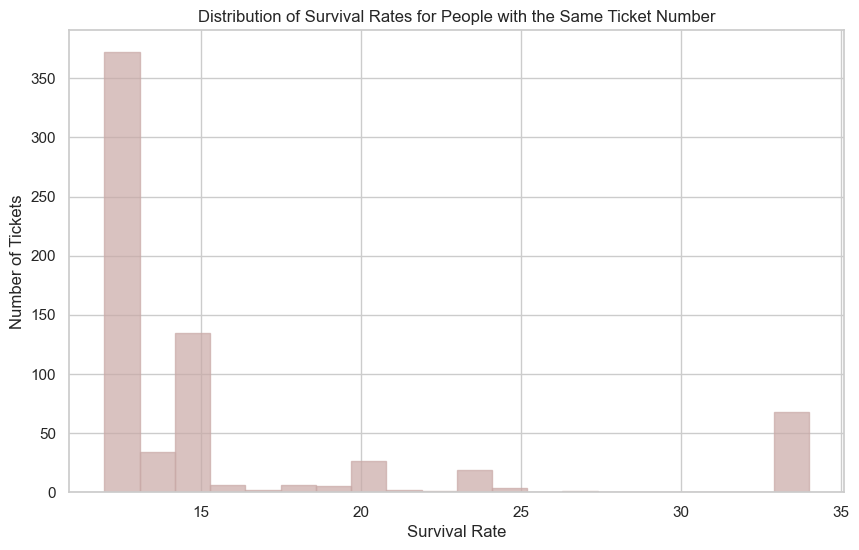

In [75]:
ticket_grouped = t_data.groupby('Ticket')['Survived'].mean().reset_index()
plt.figure(figsize=(10, 6))
color = (201/255, 169/255, 166/255, 1)
plt.hist(ticket_grouped['Survived'], bins=20, edgecolor=color, alpha=0.7, color='#c9a9a6')
plt.xlabel('Survival Rate')
plt.ylabel('Number of Tickets')
plt.title('Distribution of Survival Rates for People with the Same Ticket Number')
plt.grid(True)
plt.show()

<div style="text-align: center;">
    <h1 style="color: darkblue;"><strong>Q40: How many passengers have duplicate ticket numbers?</strong></h1>
</div>

In [76]:
duplicates = data[t_data.duplicated(subset='Ticket', keep=False)]
num_passengers_with_duplicates = len(duplicates)
print(f'Number of passengers with duplicate ticket numbers: {num_passengers_with_duplicates}')

Number of passengers with duplicate ticket numbers: 344


<div style="text-align: center;">
    <h1 style="color: darkblue;"><strong>Q41: How many unique titles are there among passengers, and what are they?</strong></h1>
</div>

In [77]:
titles = t_data['Title'].unique()
titles_count = t_data['Title'].nunique()
print("Number of Unique Titles:",titles_count)
print("Unique Titles:",titles)

Number of Unique Titles: 17
Unique Titles: ['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer']


<div style="text-align: center;">
    <h1 style="color: darkblue;"><strong>Q43: What is the lowest fare paid by a passenger, and who is the passenger?</strong></h1>
</div>

In [78]:
data_sorted_by_fare = data.sort_values(by='Fare')
lowest_fare_passenger = data_sorted_by_fare.iloc[0]
lowest_fare = lowest_fare_passenger['Fare']
print(f"The passenger with the lowest fare is {lowest_fare_passenger['Name']} with a fare of ${lowest_fare:.2f}")

The passenger with the lowest fare is Tornquist, Mr. William Henry with a fare of $0.00


There are more than one passengers who paid 0$ as the fare price.

In [79]:
lowest_fare = data['Fare'].min()
passengers_with_lowest_fare = data[data['Fare'] == lowest_fare]
for name in passengers_with_lowest_fare['Name']:
    print(name)

Leonard, Mr. Lionel
Harrison, Mr. William
Tornquist, Mr. William Henry
Parkes, Mr. Francis "Frank"
Johnson, Mr. William Cahoone Jr
Cunningham, Mr. Alfred Fleming
Campbell, Mr. William
Frost, Mr. Anthony Wood "Archie"
Johnson, Mr. Alfred
Parr, Mr. William Henry Marsh
Watson, Mr. Ennis Hastings
Knight, Mr. Robert J
Andrews, Mr. Thomas Jr
Fry, Mr. Richard
Reuchlin, Jonkheer. John George


<div style="text-align: center;">
    <h1 style="color: darkblue;"><strong>Q44: Similarly what is the highest fare paid by a passenger, and who is the passenger?</strong></h1>
</div>

In [80]:
data_sorted_by_fare = data.sort_values(by='Fare', ascending=False)
highest_fare_passenger = data_sorted_by_fare.iloc[0]
highest_fare = highest_fare_passenger['Fare']
print(f"The passenger with the highest fare is {highest_fare_passenger['Name']} with a fare of ${highest_fare:.2f}")

The passenger with the highest fare is Ward, Miss. Anna with a fare of $512.33


Similarly, there are more people who paid the highest fare on board.

In [81]:
highest_fare = data['Fare'].max()
passengers_with_highest_fare = data[data['Fare'] == highest_fare]
for name in passengers_with_highest_fare['Name']:
    print(name)

Ward, Miss. Anna
Cardeza, Mr. Thomas Drake Martinez
Lesurer, Mr. Gustave J


<div style="text-align: center;">
    <h1 style="color: darkblue;"><strong>Q45: How many passengers were traveling with a spouse or sibling, and how many were traveling with a parent or child?</strong></h1>
</div>

In [82]:
passengers_with_spouse_sibling = data[t_data['SibSp'] > 0]
passengers_with_parent_child = data[t_data['Parch'] > 0]
num_passengers_with_spouse_sibling = len(passengers_with_spouse_sibling)
num_passengers_with_parent_child = len(passengers_with_parent_child)
print(f"Passengers traveling with a spouse or sibling: {num_passengers_with_spouse_sibling}")
print(f"Passengers traveling with a parent or child: {num_passengers_with_parent_child}")

Passengers traveling with a spouse or sibling: 283
Passengers traveling with a parent or child: 213


<div style="text-align: center;">
    <h1 style="color: darkblue;"><strong>Q46: How does the average family size (SibSp + Parch) vary between different passenger classes (Pclass)?</strong></h1>
</div>

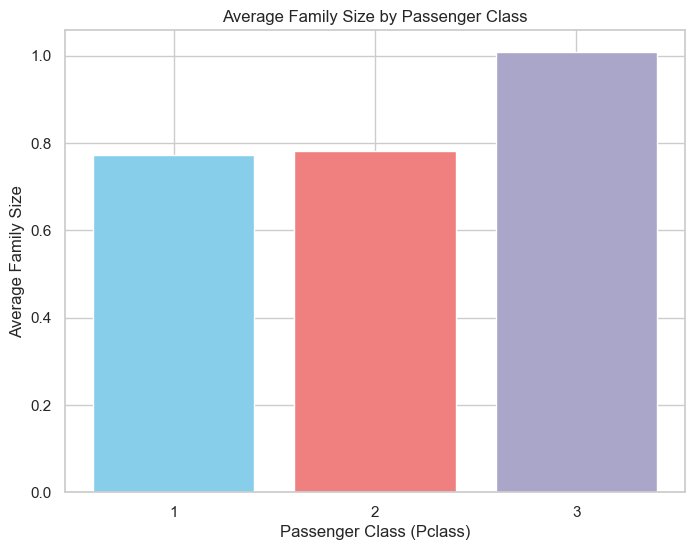

In [83]:
t_data['FamilySize'] = t_data['SibSp'] + t_data['Parch']
average_family_size_by_class = t_data.groupby('Pclass')['FamilySize'].mean().reset_index()

plt.figure(figsize=(8, 6))
plt.bar(average_family_size_by_class['Pclass'], average_family_size_by_class['FamilySize'], color=['skyblue', 'lightcoral', '#a9a6c9'])
plt.xlabel('Passenger Class (Pclass)')
plt.ylabel('Average Family Size')
plt.title('Average Family Size by Passenger Class')
plt.xticks(average_family_size_by_class['Pclass'])
plt.show()

<div style="text-align: center;">
    <h1 style="color: darkblue;"><strong>Q47: What is the survival rate for children compared to adults and seniors?</strong></h1>
</div>

In [84]:
child_age_threshold = 18
senior_age_threshold = 60
data['AgeGroup'] = pd.cut(data['Age'], bins=[0, child_age_threshold, senior_age_threshold, float('inf')], labels=['Child', 'Adult', 'Senior'], right=False)
survival_rate_by_age_group = data.groupby('AgeGroup')['Survived'].mean()
print("Survival Rate by Age Group:")
print(survival_rate_by_age_group)

Survival Rate by Age Group:
AgeGroup
Child     15.734513
Adult     15.829565
Senior    17.538462
Name: Survived, dtype: float64


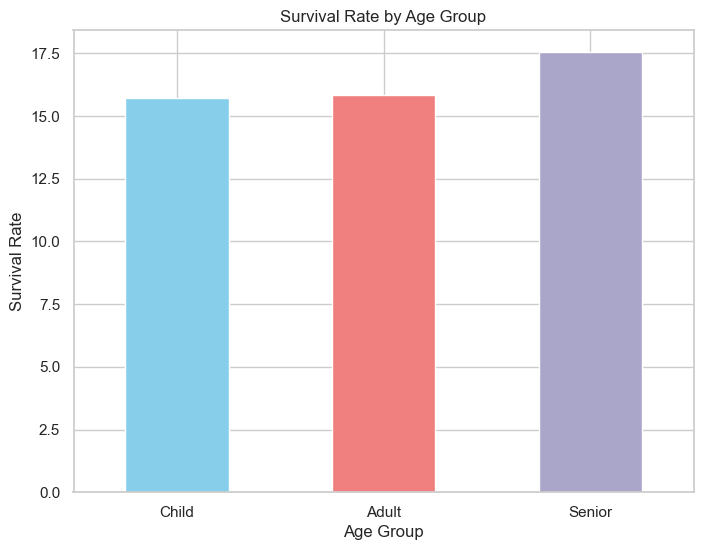

In [93]:
data1 = survival_rate_by_age_group 


plt.figure(figsize=(8, 6))
data1.plot(kind='bar', color = ['skyblue', 'lightcoral', '#a9a6c9'])
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Age Group')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()